In [1]:
! pip install plotnine
! pip install ipympl
! pip install plotly
! pip install natsort
! pip install -U kaleido

import plotly
plotly.__version__ #5.6.0
import kaleido #required
kaleido.__version__ #0.2.1



'0.2.1'

In [2]:
%matplotlib widget

In [3]:
import pandas as pd
from plotnine import *
import plotly.express as px
from natsort import index_natsorted
import numpy as np
from util.datasource import anything, corroles
from util.analysis import ext_modes, plot_selector, perc_comp, perc_ext

In [4]:
df = corroles.dataFrame
df["dominant"] = df[plot_selector].idxmax(axis=1)
df

,CCDC,M,Group,Ligand,No_Subs,Axial,Coord_No,CoSolv,Cavity,min. Basis,...,wav y 1 %,pro 1 %,dom 2 %,sad 2 %,ruf 2 %,wav x 2 %,wav y 2 %,pro 2 %,category,dominant
0,1524773,Dy,Ln,FTPC,3,Pthalocyanin,8,NaN,6.654947,sad,...,0.082515,0.075726,0.014297,0.074066,0.069934,0.174259,0.114484,0.062174,f-Block Corrole,sad comp
1,1482209,Ce,Ln,"(5,15-Mes/10-OMe)TPC",3,Cp/THF,10,Toluene/NaCp/Na+,7.231808,dom,...,0.036423,0.010164,0.053381,0.042290,0.018886,0.005546,0.001224,0.006363,f-Block Corrole,dom comp
2,930334,U,Ln,"(5,15-Mes/10-OMe)TPC",3,Cl/DME/Dimer,8,NaN,7.232352,dom,...,0.008158,0.002186,0.033300,0.007989,0.008733,0.007904,0.016276,0.006573,f-Block Corrole,dom comp
3,930333,Th,Ln,"(5,15-Mes/10-OMe)TPC",3,Cl/DME/Dimer,8,NaN,7.374410,dom,...,0.019531,0.005360,0.016925,0.006267,0.000148,0.014507,0.015288,0.000216,f-Block Corrole,dom comp
4,1498989,Lu,Ln,"(5,15-Mes/10-OMe)TPC",3,Cp,9,Toluene/Cryptand,7.475076,dom,...,0.008456,0.004061,0.000478,0.017058,0.019118,0.043547,0.005223,0.000732,f-Block Corrole,dom comp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1439714,H,1,"2,18-Cl-TolTPC",5,NaN,0,NaN,7.612757,sad,...,0.065687,0.007457,0.018566,0.060959,0.000030,0.000789,0.045048,0.007749,Freie Corrol Basen,sad comp
583,1439715,H,1,"17,18-Br-TolTPC",5,NaN,0,DCM,7.555179,sad,...,0.027986,0.002501,0.014449,0.082911,0.007542,0.010684,0.063084,0.011688,Freie Corrol Basen,sad comp
584,1062260,H,1,Br8-pFTPC,11,NaN,0,DCM,7.501071,sad,...,0.034393,0.002391,0.034408,0.078145,0.003171,0.003301,0.013545,0.005904,Freie Corrol Basen,sad comp
585,767455,H,1,Br8-pFTPC,11,NaN,0,NaN,7.448358,sad,...,0.030282,0.013721,0.061438,0.066184,0.023027,0.022833,0.003145,0.004424,Freie Corrol Basen,sad comp


### Select only direct porphystruct output

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 

In [6]:
preprocess = ColumnTransformer(
    transformers = [
        ("prepocess_ext", Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
                ("scaler", StandardScaler())
            ]
        ), perc_ext + ["Doop (exp.)"])
    ], sparse_threshold=0)

In [7]:
tsne = TSNE(n_components=2, random_state=91, perplexity=50)
mapping = tsne.fit_transform(preprocess.fit_transform(df))

In [8]:
df_mapping = pd.DataFrame(mapping, columns=["x", "y"])
df_mapping["category"] = df["category"]
df_mapping["M"] = df["M"]
df_mapping["Doop"] = df["Doop (exp.)"]
df_mapping["Coord_No"] = df["Coord_No"]
df_mapping["No_Subs"] = df["No_Subs"]
df_mapping["Group"] =  df["Group"].astype(str)
df_mapping["dominant"] = df["dominant"]
df_mapping["Ligand"] = df["Ligand"]
df_mapping["Axial"] = df["Axial"]
df_mapping["CCDC"] = df["CCDC"]
df_mapping["cu"] = df["M"] == "Cu"
df_mapping["h"] = df["M"] == "H"
df_mapping["hcu"] = df_mapping["cu"] + df_mapping["h"]
df_mapping["rad"] = df["CCDC"] == 1060277

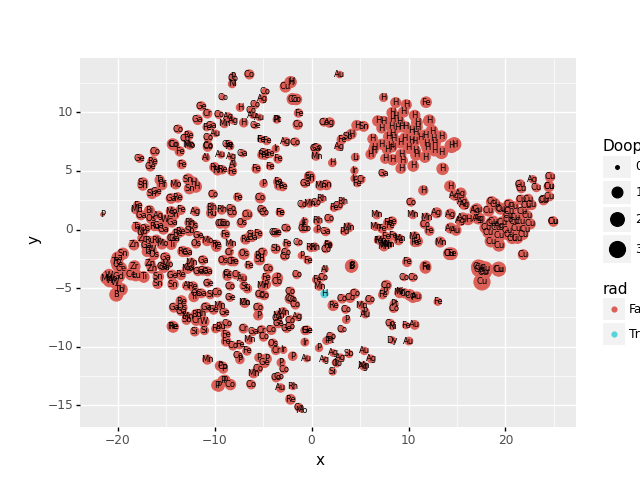

<ggplot: (87819478435)>

In [9]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="rad", size="Doop")) + geom_text(size=6)

In [10]:
fig = px.scatter(df_mapping, x="x", y="y", color="cu", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)
fig.write_html("out/tsne_cu.html", include_plotlyjs="cdn")
fig.write_image("out/tsne_cu.png", engine="kaleido",scale=15)

In [11]:
fig = px.scatter(df_mapping, x="x", y="y",  size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)
fig.write_html("out/tsne_blue.html", include_plotlyjs="cdn")
fig.write_image("out/tsne_blue.png", engine="kaleido",scale=15)

In [12]:
fig = px.scatter(df_mapping, x="x", y="y", color="h", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)
fig.write_html("out/tsne_h.html", include_plotlyjs="cdn")
fig.write_image("out/tsne_h.png", engine="kaleido",scale=15)

### By Dominant Mode

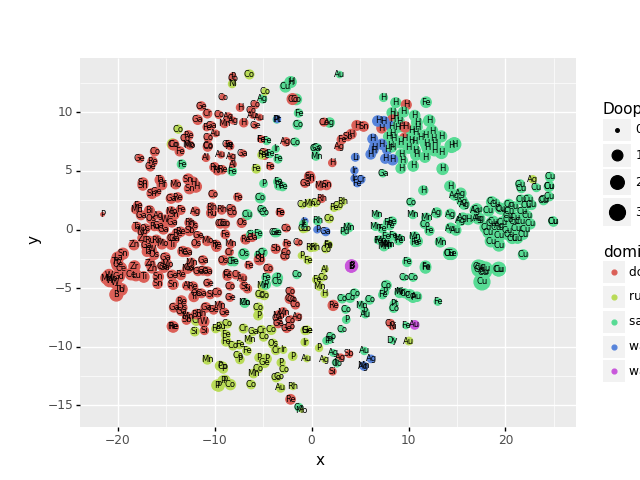

<ggplot: (87826426986)>

In [13]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="dominant", size="Doop")) + geom_text(size=6)

In [14]:
fig = px.scatter(df_mapping, x="x", y="y", color="dominant", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)
fig.write_html("out/tsne_dominant.html", include_plotlyjs="cdn")
fig.write_image("out/tsne_dominant.png", engine="kaleido",scale=15)

### By Group

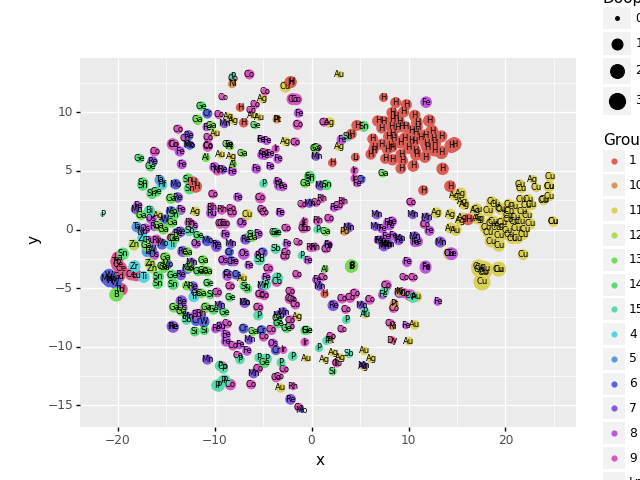

<ggplot: (87829797373)>

In [15]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="Group", size="Doop")) + geom_text(size=6)

In [16]:
color = "Group"
df_mapping.sort_values(by=color, key=lambda x: np.argsort(index_natsorted(df_mapping[color])), inplace=True)
fig = px.scatter(df_mapping, x="x", y="y", color=color, size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)
fig.write_html("out/tsne_group.html")

### By Category

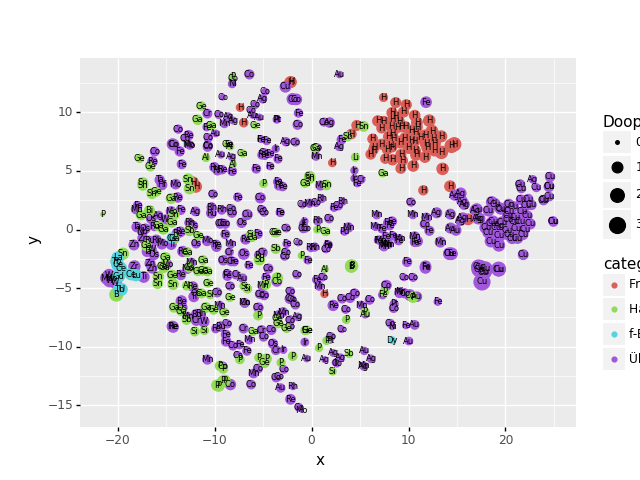

<ggplot: (87830257661)>

In [17]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="category", size="Doop")) + geom_text(size=6)

In [18]:
color = "category"
df_mapping.sort_values(by=color, key=lambda x: np.argsort(index_natsorted(df_mapping[color])), inplace=True)
fig = px.scatter(df_mapping, x="x", y="y", color=color, size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)

fig.write_html("out/tsne_category.html")


### By Coordination Number

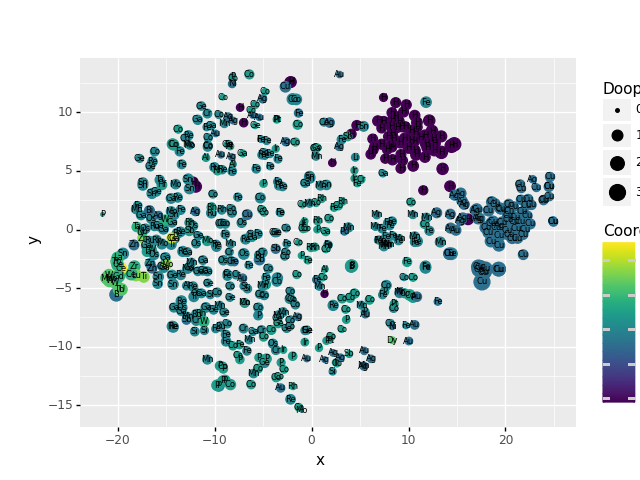

<ggplot: (87829625896)>

In [19]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="Coord_No", size="Doop")) + geom_text(size=6)

In [20]:
color = "Coord_No"
df_mapping.sort_values(by=color, key=lambda x: np.argsort(index_natsorted(df_mapping[color])), inplace=True)
df_mapping[color] = df_mapping[color].astype(str)
fig = px.scatter(df_mapping, x="x", y="y", color=color, size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)

fig.write_html("out/tsne_coordNo.html")


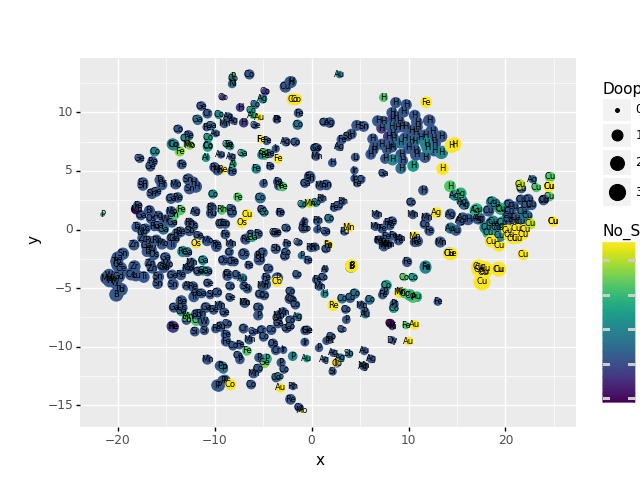

<ggplot: (87830868240)>

In [21]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="No_Subs", size="Doop")) + geom_text(size=6)

In [22]:
color = "No_Subs"
df_mapping.sort_values(by=color, key=lambda x: np.argsort(index_natsorted(df_mapping[color])), inplace=True)
df_mapping[color] = df_mapping[color].astype(str)
fig = px.scatter(df_mapping, x="x", y="y", color=color, size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}<br>Doop: %{customdata[5]}")
fig.update_traces(textfont_size=8)

fig.write_html("out/tsne_NoSubs.html")
